Задача 1

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.

Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
Постройте для коэффициентов регрессии доверительные интервалы с помощью t-статистики Стьюдента.

Для парной регрессии ищем по формулам:
b1 = ((y*x)ср - yср*xср)/((x**2)ср - xср**2)
b0 = yср - b1*xср

In [59]:
import numpy as np
from scipy import stats 
import pandas as pd
from matplotlib import pyplot as plt
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
Y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
Xsr = np.mean(X)
Ysr = np.mean(Y)
n=len(X)
b1 = ((X*Y).mean()-X.mean()*Y.mean())/((X**2).mean()-(X.mean()**2))
print(b1)

2.620538882402765


In [60]:
b0 = Y.mean()-(b1*X.mean())
print(b0)

444.1773573243596


In [61]:
y=b0+b1*X
y


array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

In [62]:
Y2=Y.reshape(-1,1)
Y2

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [63]:
X2=np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ones=np.ones((X2.shape[0],1))
X2=X2.reshape(-1,1)
X2=np.hstack((ones,X2))
X2

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

Для расчета коэфф. b  с помощью метода наименьших посчитаем произведение обратной матрицы на матрицу X2 и посчитаем определитель полученной матрицы

In [64]:
X2T_X2 = X2.T.dot(X2)
np.linalg.det(X2T_X2)

349464.00000000023

In [65]:
X2T_X2

array([[1.00000e+01, 1.01400e+03],
       [1.01400e+03, 1.37766e+05]])

Так как определитель не близок к нулю, можно записать аналитическое решение.
b = ((X(T)*X)**-1)*X(T)*Y

In [66]:
XTX_inv = np.linalg.inv(X2T_X2)
b=XTX_inv.dot(X2.T).dot(Y2) 
b

array([[444.17735732],
       [  2.62053888]])

Уравнение имеет вид
y = 444.17735732 + 2.62053888*x     
Коэффициэнты, полученные расчетом двумя методами практически одинаковые.

Строим график y(x) и отмечаем линию регрессии

Text(0, 0.5, 'Cкоринг')

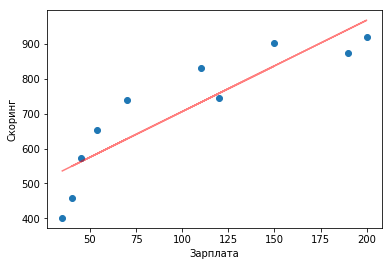

In [67]:
ox=X
oy=b0+b1*ox
plt.scatter(X,Y)
plt.plot(ox,oy,color='red',alpha=0.5)
plt.xlabel('Зарплата')
plt.ylabel('Cкоринг')

Для расчета коэффициента детерминации используем формулу   
R2 = Dmodel/Dy
zi = b0 + b1xi1 + ...+bkxik

In [68]:
Z = (444.17735732 + 2.62053888*X)
Z

array([535.89621812, 562.10160692, 942.07974452, 968.28513332,
       548.99891252, 627.61507892, 585.68645684, 837.25818932,
       758.64202292, 732.43663412])

In [69]:
R = Z.var()/Y.var()
print('коэффициэнт детерминации', R)

коэффициэнт детерминации 0.7876386620850004


МОжно коэфф. дерминации выразить через квадрат коэфф. корреляции между x и Y

In [70]:
np.corrcoef(X,Y)**2

array([[1.        , 0.78763866],
       [0.78763866, 1.        ]])

Средняя ошибка аппроксимации рассчитывается по формуле
Aср = 1/n* СУММ|(Yi-Zi)/Yi|

In [71]:
A = np.abs((Y-Z)/Y).mean()
print('Cредняя ошибка аппроксимации',A)

Cредняя ошибка аппроксимации 0.11469251838315171


Оцените построенное уравнение регрессии с помощью F-критерия Фишера.  НУлевая гипотеза состоит в том, что все коэфф. регрессии равны нулю.
T = (R2/ 1-R2)*((n-k-1)/k)
k - число факторов
k2 = n-k-1
Fcrit = F(k,k2)    
Если Т>Fcrit то уравнение регрессии статистически значимо

In [72]:
n = 10
k=1
k2 = n-k-1
T = (R/(1-R))*(k2/k)
T

29.671640603442167

In [73]:
alfa = 0.05
F=stats.f.ppf(1-alfa,k,k2)
F

5.317655071578714

Полученное уравнение регрессии статистически значимо

Найдем доверительные интервалы с помощью статистики Стьюдента. Определим стандартную ошибку S

In [74]:
s_residual = np.sqrt(np.sum((Y - Z)**2) / (n - 2))
m_a = s_residual * np.sqrt(np.sum(X ** 2)) / (n * np.std(X))
m_b = s_residual / (np.std(X) * np.sqrt(n))

print('s_residual = {}\nm_a = {}\nm_b = {}'.format(s_residual, m_a, m_b))

s_residual = 89.93340731602925
m_a = 56.466497550681524
m_b = 0.48108279568516


Вычислим наблюдаемые значения критерия  ta  и  tb

In [75]:
t_a = b0 / m_a
t_a

7.866210524668864

In [76]:
t_b = b1 / m_b
t_b

5.447168150485579

tкр при n=10 b alfa = 0.05 равен 2,306

Фактические значения t-статистики больше табличного значения: поэтому параменты b0 и b1 статистически значимы

Рассчитаем доверительные интервалы для параметров регрессии  b0  и  b1 . Для этого определим предельную ошибку для каждого показателя ( Δb0  и  Δb1 ),

используя значение  tкр , равное 2.306 (переменная t_cr):

In [77]:
t_cr=2.306
delta_b0= t_cr * m_a
delta_b0

130.2117433518716

In [78]:
delta_b1= t_cr * m_b
delta_b1

1.109376926849979

Найдем границы доверительных интервалов
Граница доверительного интервала для b0

In [79]:
gamma_b0_min = b0 - delta_b0
gamma_b0_min

313.965613972488

In [80]:
gamma_b0_max = b0 + delta_b0
gamma_b0_max

574.3891006762312

Граница доверительного интервала для b0

In [81]:
gamma_b1_min = b1 - delta_b1
gamma_b1_min

1.511161955552786

In [82]:
gamma_b1_max = b1 + delta_b1
gamma_b1_max

3.729915809252744

Задача 2

Допустим, первые 5 клиентов из предыдущего задания проживают в Москве, а остальные - в Санкт-Петербурге. Влияет ли этот фактор на значение их кредитного скоринга?


In [83]:
X3=np.array([[0.,35], [0.,45], [0.,190], [0.,200],[0.,40], [1.,70], [1.,54],[1.,150],[1.,120],[1., 110]])
X3=np.hstack((ones,X3))
X3

array([[  1.,   0.,  35.],
       [  1.,   0.,  45.],
       [  1.,   0., 190.],
       [  1.,   0., 200.],
       [  1.,   0.,  40.],
       [  1.,   1.,  70.],
       [  1.,   1.,  54.],
       [  1.,   1., 150.],
       [  1.,   1., 120.],
       [  1.,   1., 110.]])

In [84]:
X3T_X3 = X3.T.dot(X3)
np.linalg.det(X3T_X3)

873569.9999999999

In [85]:
X3T_X3

array([[1.00000e+01, 5.00000e+00, 1.01400e+03],
       [5.00000e+00, 5.00000e+00, 5.04000e+02],
       [1.01400e+03, 5.04000e+02, 1.37766e+05]])

In [86]:
XTX_inv = np.linalg.inv(X3T_X3)
b=XTX_inv.dot(X3.T).dot(Y2) 
b

array([[376.94782101],
       [132.15826093],
       [  2.63188411]])

Полученное уравнение имеет вид

Y=376.94782101 + 132.15826093*x1 + 2.63188411*x2

In [87]:
Z1 = X3.dot(b)
Z1

array([[469.06376478],
       [495.38260586],
       [877.00580148],
       [903.32464256],
       [482.22318532],
       [693.33796948],
       [651.22782376],
       [903.8886981 ],
       [824.93217487],
       [798.61333379]])

In [88]:
print(Y2)
print(Z)
print(Z1)

[[401]
 [574]
 [874]
 [919]
 [459]
 [739]
 [653]
 [902]
 [746]
 [832]]
[535.89621812 562.10160692 942.07974452 968.28513332 548.99891252
 627.61507892 585.68645684 837.25818932 758.64202292 732.43663412]
[[469.06376478]
 [495.38260586]
 [877.00580148]
 [903.32464256]
 [482.22318532]
 [693.33796948]
 [651.22782376]
 [903.8886981 ]
 [824.93217487]
 [798.61333379]]


In [89]:
R1 = Z1.var()/Y.var()
R1

0.9309324190087581

In [90]:
A1 = np.abs((Y-Z1)/Y).mean()
A1

0.31379462312226686

Коэффициэнт детерминации получился  гораздо выше, чем в примере 1, соответственно место проживания оказывает влияние на кретитный скорринг. НО при этом сильно выросла ошибка аппроксимации.

In [91]:
k1=2
k2 = n-k1-1
T = (R1/(1-R1))*(k2/k1)
print(T)
print(k2)

47.17500482525684
7


In [92]:
F1=stats.f.ppf(1-alfa,k1,k2)
F1

4.73741412777588

Полученной уравнение регрессии статистически значимо

После того, как решила этим способом, посмотрела разбор задания и видела, что задачу надо было решать другим способом и ответ получился противоположным. Хочу понять, почему нельзя было решить задачу моим способом? В чем ошибка? Почему нельзя добавить признак Москва/Питер как булеровскую переменную в матрицу значений Х и посчитать через метод наименьших квадратов? Ведь с ростом и весом хоккеистов этот метод использовался? Почему же в данном случае он дает противоположный ответ? Хотя значения модель предсказывает близко к реальным данным и коэффициэнт регрессии выше, чем у первой модели

Задача 3

Посчитать коэффициенты линейной регрессии для т.н. Квартета Энскомба (см. урок 6).

In [95]:
anscombe_dataset = pd.read_csv('anscombe_dataset.csv', index_col='id')

anscombe_dataset

,x1,y1,x2,y2,x3,y3,x4,y4
id,,,,,,,,
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56


Считаем средние

In [96]:
anscombe_dataset.mean()


x1    9.000000
y1    7.500909
x2    9.000000
y2    7.500909
x3    9.000000
y3    7.500000
x4    9.000000
y4    7.500909
dtype: float64

Дисперсии

In [97]:
anscombe_dataset.var()

x1    11.000000
y1     4.127269
x2    11.000000
y2     4.127629
x3    11.000000
y3     4.122620
x4    11.000000
y4     4.123249
dtype: float64

Коэффициэнт корреляции

In [98]:
anscombe_dataset.corr()

,x1,y1,x2,y2,x3,y3,x4,y4
x1,1.000000,0.816421,1.000000,0.816237,1.000000,0.816287,-0.500000,-0.314047
y1,0.816421,1.000000,0.816421,0.750005,0.816421,0.468717,-0.529093,-0.489116
x2,1.000000,0.816421,1.000000,0.816237,1.000000,0.816287,-0.500000,-0.314047
y2,0.816237,0.750005,0.816237,1.000000,0.816237,0.587919,-0.718437,-0.478095
x3,1.000000,0.816421,1.000000,0.816237,1.000000,0.816287,-0.500000,-0.314047
y3,0.816287,0.468717,0.816287,0.587919,0.816287,1.000000,-0.344661,-0.155472
x4,-0.500000,-0.529093,-0.500000,-0.718437,-0.500000,-0.344661,1.000000,0.816521
y4,-0.314047,-0.489116,-0.314047,-0.478095,-0.314047,-0.155472,0.816521,1.000000


Графики данных

1-й датасет, b0 = 3.0000909090909245, b1 = 0.5000909090909076
2-й датасет, b0 = 3.000909090909091, b1 = 0.5
3-й датасет, b0 = 3.0024545454545697, b1 = 0.49972727272727013
4-й датасет, b0 = 3.0017272727272584, b1 = 0.4999090909090924


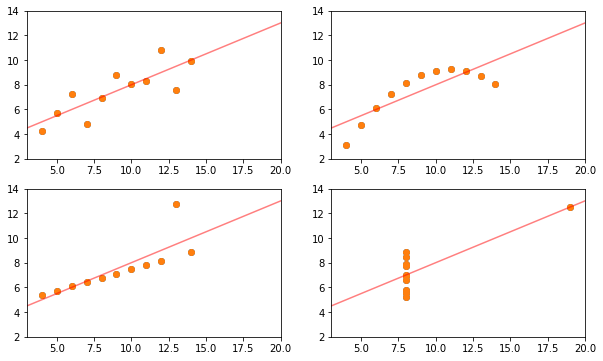

In [116]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(10, 6)
ox = np.linspace(3,20,10**4)
for i, ax in enumerate(axes.flatten()):
    i+=1
    x_key = f'x{i}'
    y_key = f'y{i}'
    
    x = anscombe_dataset[x_key]
    y = anscombe_dataset[y_key]
    
    b1 = ((x*y).mean()-x.mean()* y.mean())/((x**2).mean()-(x.mean()**2))
    b0 = y.mean() - (b1* x.mean())                                      
    ax.scatter(anscombe_dataset[x_key], anscombe_dataset[y_key])
    print(f'{i}-й датасет, b0 = {b0}, b1 = {b1}')
    oy=b0+b1*ox                                       
    ax.scatter(x,y)                                       
    ax.plot(ox,oy,color='red',alpha=0.5)            
    ax.set_xlim(3, 20)
    ax.set_ylim(2, 14)